In [ ]:
# Start writing code here...
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [ ]:
df_RSS_collated = pd.read_excel('data/RSS_collated.xlsx',engine='openpyxl', parse_dates=True)
df_RGG_collated=pd.read_excel('/work/data/RGG Master Data Collection All.xlsx',engine='openpyxl', parse_dates=True)

In [ ]:
df_RSS_collated.columns

Index(['Commodity', 'Vehicle Type', 'Inside/Curb', '16 gal', '20 gal',
       '32 gal', '64 gal', '96 gal', 'Neighborhood', 'Meandor', 'Route',
       'Tipper', 'Key Code?', 'Day', '#Units', 'Time'],
      dtype='object')

In [ ]:
# Making sure the columns match 
df_RGG_collated.columns
df_RGG_collated.rename(columns = {'Vehicle Type  ':'Vehicle Type', \
                         'Neighborhood ' : 'Neighborhood', \
                         'Meandor ': 'Meandor', \
                         'Time(Sec)':'Time', \
                          16:'16 gal',\
                          20:'20 gal',\
                          32:'32 gal',\
                          64:'64 gal',\
                          96:'96 gal'}, inplace=True)

In [ ]:
# Creating a key column. since we do not see key column we will assume there were no keys 
df_RGG_collated['Key Code?']=0

### Appending RSS and RGG Data into a data frame (df_RGG_RSS)

In [ ]:
df_RGG_collated=df_RGG_collated[['Commodity', 'Vehicle Type', 'Inside/Curb', '16 gal', '20 gal',
       '32 gal', '64 gal', '96 gal', 'Neighborhood', 'Meandor', 'Route',
       'Tipper', 'Key Code?', 'Day', '#Units', 'Time']]

In [ ]:
df_RGG_collated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10573 entries, 0 to 10572
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Commodity     10573 non-null  object 
 1   Vehicle Type  10118 non-null  object 
 2   Inside/Curb   10273 non-null  object 
 3   16 gal        10572 non-null  float64
 4   20 gal        10573 non-null  int64  
 5   32 gal        10573 non-null  object 
 6   64 gal        10572 non-null  float64
 7   96 gal        10573 non-null  int64  
 8   Neighborhood  116 non-null    object 
 9   Meandor       5461 non-null   object 
 10  Route         10573 non-null  int64  
 11  Tipper        9815 non-null   float64
 12  Key Code?     10573 non-null  int64  
 13  Day           10573 non-null  int64  
 14  #Units        10493 non-null  object 
 15  Time          10217 non-null  float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.3+ MB


In [ ]:
# Final Dataframe
df_RSS_collated['Company']='RSS'
df_RGG_collated['Company']='RGG'
df_RGG_RSS=pd.concat([df_RSS_collated,df_RGG_collated])
df_RGG_RSS['Time']=pd.to_numeric(df_RGG_RSS['Time'], errors='coerce')
df_RGG_RSS['Meandor']=df_RGG_RSS['Meandor'].replace('N','No').replace('Y','Yes')
df_RGG_RSS['32 gal']=pd.to_numeric(df_RGG_RSS['32 gal'], errors='coerce')
df_RGG_RSS['#Units']=df_RGG_RSS['16 gal']+df_RGG_RSS['20 gal']+df_RGG_RSS['32 gal']+df_RGG_RSS['64 gal']+df_RGG_RSS['96 gal']
df_RGG_RSS['Commodity']=df_RGG_RSS['Commodity'].replace('Recycle ','Recycle').replace('R','Recycle').replace('G', 'Garbage').replace('GB', 'Garbage')
df_RGG_RSS['Inside/Curb'] = df_RGG_RSS['Inside/Curb'].str.strip().replace('c', 'C').replace('i', 'I').replace('ic', 'IC').replace('',np.nan)
df_RGG_RSS['Vehicle Type'] = df_RGG_RSS['Vehicle Type'].str.strip().replace('HIEL', 'HEIL')
df_RGG_RSS['Tipper']=pd.to_numeric(df_RGG_RSS['Tipper'],errors='ignore')


In [ ]:
df_RGG_RSS.head()

,Commodity,Vehicle Type,Inside/Curb,16 gal,20 gal,32 gal,64 gal,96 gal,Neighborhood,Meandor,Route,Tipper,Key Code?,Day,#Units,Time,Company
0,Recycle,S-HEIL,C,0.0,0,1.0,2.0,2,0,NaN,912,2,NaN,2,5.0,118.0,RSS
1,Recycle,S-HEIL,C,0.0,0,0.0,0.0,1,0,NaN,912,2,NaN,2,1.0,59.0,RSS
2,Recycle,S-HEIL,I,0.0,0,0.0,0.0,1,0,NaN,912,2,NaN,2,1.0,86.0,RSS
3,Recycle,S-HEIL,C,0.0,0,1.0,0.0,1,0,NaN,912,2,NaN,2,2.0,41.0,RSS
4,Recycle,S-HEIL,C,0.0,0,1.0,0.0,0,0,NaN,912,2,NaN,2,1.0,31.0,RSS


# Shruti's EDA 

### Focus areas:

#### 1. Neighborhood (if needed, company name instead) 

#### 2. Meander – Drivers servicing both sides of street? Y/N 

#### 3. Route # 

#### 4. Tipper 

#### 5. Day 

#### 6. Time

#### Meandor EDA

In [ ]:
# Convert Time into int 
df_RGG_RSS['Time']=pd.to_numeric(df_RGG_RSS['Time'], errors='coerce')

In [ ]:
# First glance at Meandor's relationship with Time
df_RGG_RSS.groupby(['Meandor'])['Time'].median()

Meandor
No      86.0
Yes    120.0
Name: Time, dtype: float64

### Time EDA

In [ ]:
df_RGG_RSS['Time']

0        118.0
1         59.0
2         86.0
3         41.0
4         31.0
         ...  
10568     98.0
10569    100.0
10570     66.0
10571    118.0
10572    180.0
Name: Time, Length: 15558, dtype: float64

Text(0.5, 1.0, 'Time BoxPlot')

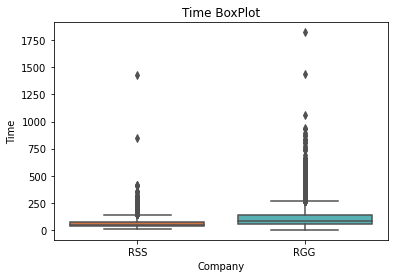

In [ ]:
orange = '#e66b2e'
teal = "#48bec2"
colors = [orange,teal]

sns.boxplot(x='Company',y = "Time", data = df_RGG_RSS, palette = colors)\
                .set_title("Time BoxPlot")

In [ ]:
sum_units=outlier_time.loc[outlier_time["#Units"]>0][['16 gal', '20 gal',
       '32 gal', '64 gal', '96 gal']].replace(0,np.nan).median(skipna=True).to_frame().reset_index().rename(columns={'index':'Bins',0:'Median_Values'})
sum_units

NameError: name 'outlier_time' is not defined

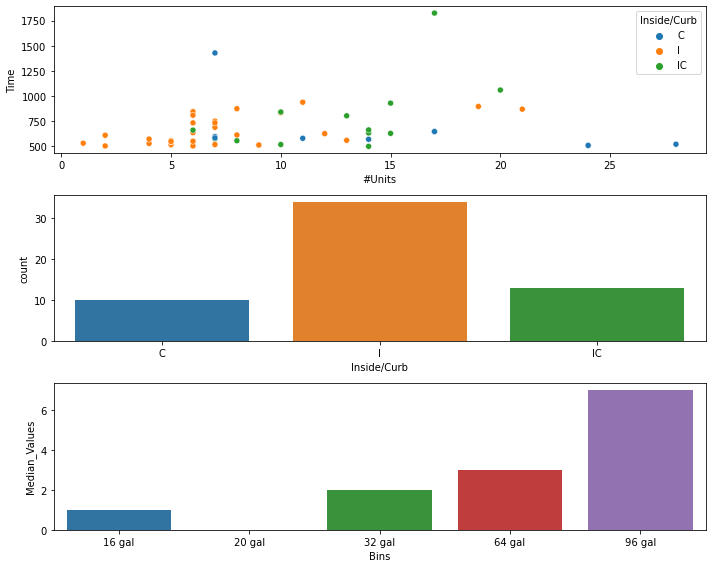

In [ ]:
fig,ax=plt.subplots(3,1,figsize=(10,8))
outlier_time=df_RGG_RSS.loc[df_RGG_RSS['Time']>500]

sns.scatterplot(data=outlier_time,x="#Units",y="Time",hue="Inside/Curb",ax=ax[0])
sns.countplot(data=outlier_time,x="Inside/Curb",ax=ax[1])
sns.barplot(x='Bins',y='Median_Values',data=sum_units,ax=ax[2])

plt.tight_layout()


In [ ]:
df_RGG_RSS_final.loc[df_RGG_RSS_final['Time']>1700]

,Commodity,Vehicle Type,Inside/Curb,16 gal,20 gal,32 gal,64 gal,96 gal,Neighborhood,Meandor,Route,Tipper,Key Code?,Day,#Units,Time,Company,Outlier
6403,Recycle,R-HEIL,IC,1.0,0,0.0,0.0,16,NaN,No,981,2.0,0,1,17.0,1824.0,RGG,1


## Day EDA

<AxesSubplot:xlabel='Day', ylabel='Time'>

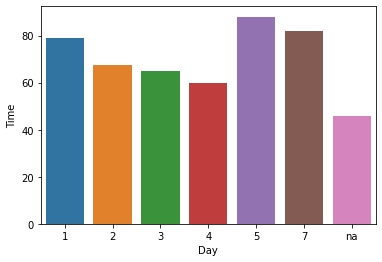

In [ ]:
median_day=df_RGG_RSS_final[['Day','Time']].groupby(['Day']).median().reset_index()

median_day
sns.barplot(x="Day",y="Time",data=median_day)

<AxesSubplot:xlabel='Day', ylabel='Time'>

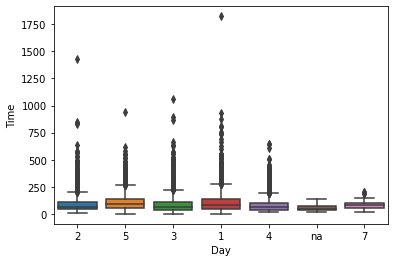

In [ ]:
sns.boxplot(x="Day",y="Time",data=df_RGG_RSS_final)

## Route EDA

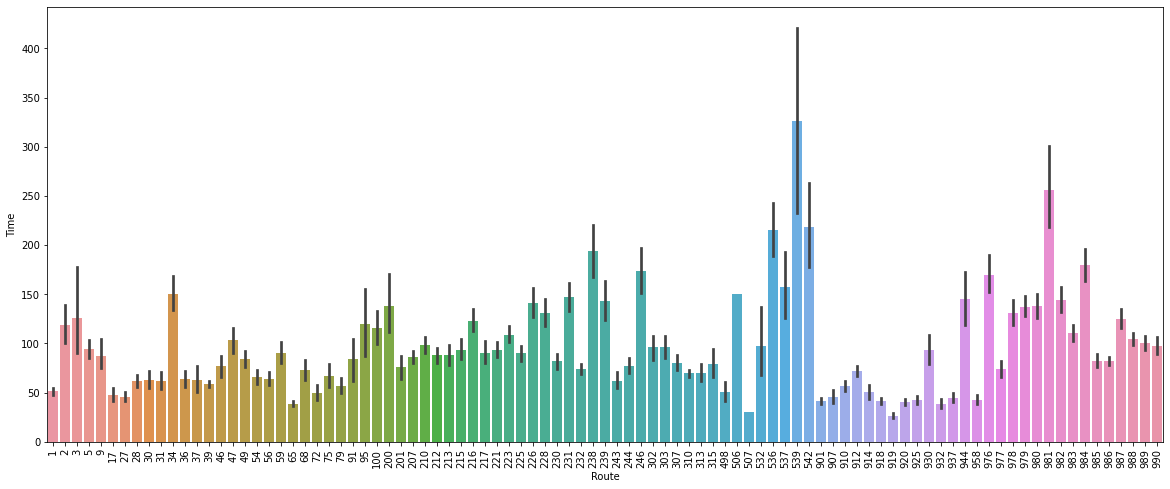

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(20,8))
#df_RGG_RSS_final
sns.barplot(x="Route",y="Time",data=df_RGG_RSS_final)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
# route 537 and route 980 have really high service times. why?
# 52% Inside and mostly 96 gallon bins seems to answer the question
df_RGG_RSS_final.loc[df_RGG_RSS_final.Route.isin([537,980])]

,Commodity,Vehicle Type,Inside/Curb,16 gal,20 gal,32 gal,64 gal,96 gal,Neighborhood,Meandor,Route,Tipper,Key Code?,Day,#Units,Time,Company
346,Garbage/Compost,R-HEIL,C,0.0,0,0.0,6.0,0,NaN,NaN,537,2.0,0,2,6.0,100.0,RGG
348,Garbage/Compost,R-HEIL,C,0.0,0,0.0,0.0,4,NaN,NaN,537,2.0,0,2,4.0,109.0,RGG
349,Garbage/Compost,R-HEIL,C,0.0,0,0.0,0.0,9,NaN,NaN,537,2.0,0,2,9.0,308.0,RGG
353,Garbage/Compost,R-HEIL,C,0.0,0,0.0,0.0,2,NaN,NaN,537,2.0,0,2,2.0,72.0,RGG
354,Garbage/Compost,R-HEIL,C,0.0,0,0.0,0.0,7,NaN,NaN,537,2.0,0,2,7.0,238.0,RGG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754,Recycle,R-HEIL,I,0.0,0,0.0,1.0,4,NaN,No,980,2.0,0,5,5.0,419.0,RGG
2755,Recycle,R-HEIL,IC,0.0,0,0.0,0.0,6,NaN,No,980,2.0,0,5,6.0,195.0,RGG
2756,Recycle,R-HEIL,I,0.0,0,0.0,0.0,4,NaN,No,980,2.0,0,5,4.0,374.0,RGG
2757,Recycle,R-HEIL,I,0.0,0,0.0,0.0,2,NaN,No,980,2.0,0,5,2.0,89.0,RGG


### Tipper EDA

<AxesSubplot:xlabel='Tipper', ylabel='count'>

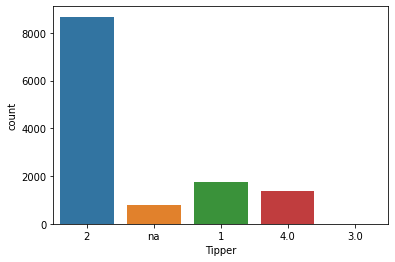

In [ ]:
sns.countplot(x="Tipper",data=df_RGG_RSS_final)

In [ ]:
df_RGG_RSS_final.loc[df_RGG_RSS_final['Tipper']==4]

,Commodity,Vehicle Type,Inside/Curb,16 gal,20 gal,32 gal,64 gal,96 gal,Neighborhood,Meandor,Route,Tipper,Key Code?,Day,#Units,Time,Company,Outlier
1720,Garbage/Recycle,S-HEIL,C,0.0,0,0.0,0.0,4,NaN,No,243,4.0,0,3,4.0,120.0,RGG,0
1721,Garbage/Recycle,S-HEIL,C,0.0,0,0.0,3.0,2,NaN,No,243,4.0,0,3,5.0,82.0,RGG,0
1722,Garbage/Recycle,S-HEIL,C,0.0,0,0.0,0.0,6,NaN,No,243,4.0,0,3,6.0,84.0,RGG,0
1723,Garbage/Recycle,S-HEIL,C,2.0,0,0.0,2.0,0,NaN,No,243,4.0,0,3,4.0,81.0,RGG,0
1724,Garbage/Recycle,S-HEIL,C,2.0,0,0.0,2.0,0,NaN,No,243,4.0,0,3,4.0,49.0,RGG,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10334,Compost,S-HEIL,I,0.0,0,0.0,1.0,0,NaN,No,313,4.0,0,2,1.0,161.0,RGG,0
10335,Compost,S-HEIL,C,0.0,0,0.0,1.0,0,NaN,No,313,4.0,0,2,1.0,38.0,RGG,0
10336,Compost,S-HEIL,I,0.0,0,1.0,0.0,0,NaN,No,313,4.0,0,2,1.0,109.0,RGG,0
10337,Compost,S-HEIL,I,0.0,0,0.0,1.0,0,NaN,No,313,4.0,0,2,1.0,109.0,RGG,0


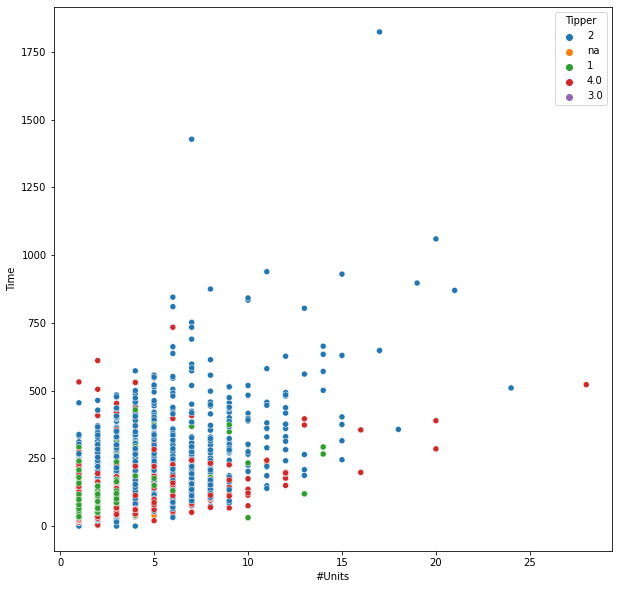

In [ ]:
## Why for less number of units, the higher tipper value takes more time?
## The bins are inside, and high gallon bins
fig,ax=plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(data=df_RGG_RSS_final,x="#Units",y="Time",hue="Tipper")
plt.show()

In [ ]:
df_RGG_RSS_final.loc[(df_RGG_RSS_final['#Units']==1)&(df_RGG_RSS_final['Tipper']==4)]

,Commodity,Vehicle Type,Inside/Curb,16 gal,20 gal,32 gal,64 gal,96 gal,Neighborhood,Meandor,Route,Tipper,Key Code?,Day,#Units,Time,Company
1766,Garbage/Recycle,S-HEIL,C,0.0,0,0.0,1.0,0,NaN,No,243,4.0,0,3,1.0,17.0,RGG
1822,Garbage/Recycle,S-HEIL,C,0.0,0,0.0,1.0,0,NaN,No,243,4.0,0,3,1.0,17.0,RGG
1833,Garbage/Recycle,S-HEIL,C,0.0,0,0.0,1.0,0,NaN,No,243,4.0,0,3,1.0,16.0,RGG
1834,Garbage/Recycle,S-HEIL,C,0.0,0,0.0,1.0,0,NaN,No,243,4.0,0,3,1.0,18.0,RGG
1855,Garbage/Recycle,S-HEIL,C,0.0,0,0.0,1.0,0,NaN,No,243,4.0,0,3,1.0,17.0,RGG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10334,Compost,S-HEIL,I,0.0,0,0.0,1.0,0,NaN,No,313,4.0,0,2,1.0,161.0,RGG
10335,Compost,S-HEIL,C,0.0,0,0.0,1.0,0,NaN,No,313,4.0,0,2,1.0,38.0,RGG
10336,Compost,S-HEIL,I,0.0,0,1.0,0.0,0,NaN,No,313,4.0,0,2,1.0,109.0,RGG
10337,Compost,S-HEIL,I,0.0,0,0.0,1.0,0,NaN,No,313,4.0,0,2,1.0,109.0,RGG


# Amee's EDA:
### Focus Areas: 
1. Commodity
2. Combination (2 streams vs 1)
3. Vehicle Type
4. I/C
5. Bin Quantity
6. Bin Size  

In [ ]:
df_RGG_RSS.columns

NameError: name 'df_RGG_RSS' is not defined

In [ ]:
# Original
df_RGG_RSS['Commodity'].value_counts()

Garbage/Compost    3478
Recycle            3132
GB                 2414
Compost            1817
Recycle            1345
R                  1271
Garbage            1182
Garbage/Recycle     875
G                    44
Name: Commodity, dtype: int64

In [ ]:
df_RGG_RSS['Commodity']=df_RGG_RSS['Commodity'].replace('Recycle ','Recycle').replace('R','Recycle').replace('G', 'Garbage').replace('GB', 'Garbage')

In [ ]:
# Final 
df_RGG_RSS['Commodity'].value_counts()

Recycle            5748
Garbage            3640
Garbage/Compost    3478
Compost            1817
Garbage/Recycle     875
Name: Commodity, dtype: int64

Text(0.5, 1.0, 'Median Service Time')

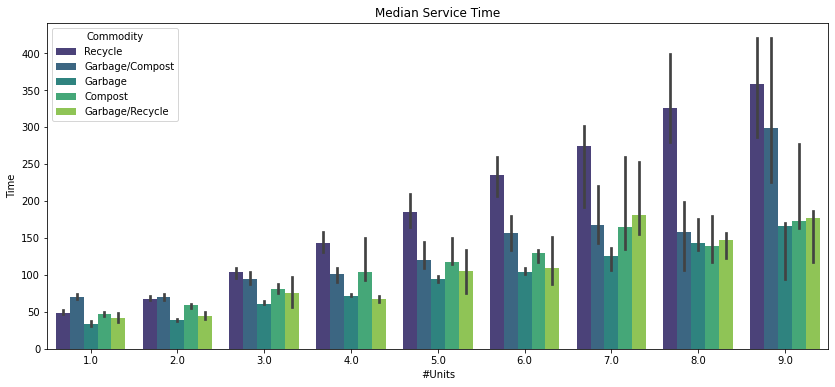

In [ ]:
fig,ax = plt.subplots(figsize=(14,6))

df = df_RGG_RSS_final.loc[df_RGG_RSS_final['#Units']<10]

#palette='crest', 'GnBu', 'Spectral', 'rocket'

sns.barplot(x ='#Units', y = "Time", data = df,  palette='viridis', hue="Commodity", ax = ax, estimator=np.median).set_title("Median Service Time")

In [ ]:
fig,ax = plt.subplots(figsize=(14,6))

df = df_RGG_RSS_final.loc[df_RGG_RSS_final['#Units']<10]

#palette='crest', 'GnBu', 'Spectral', 'rocket'

sns.barplot(x ='#Units', y = "Time", data = df,  palette='viridis', hue="Commodity", ax = ax, estimator=np.median).set_title("Median Service Time")

In [ ]:
df = df_RGG_RSS_final.loc[df_RGG_RSS['#Units']<10]
df

ValueError: cannot reindex from a duplicate axis

In [ ]:
df_RGG_RSS['Vehicle Type'].value_counts()

S-HEIL      5562
R-HEIL      4189
na          2546
F-HEIL       989
HIEL         702
R-LAB        352
S-LODAL      152
na           100
HEIL          85
City Can      80
LODAL         68
F-LODAL       50
LABRI         13
Name: Vehicle Type, dtype: int64

In [ ]:
df_RGG_RSS['Vehicle Type'] = df_RGG_RSS['Vehicle Type'].str.strip().replace('HIEL', 'HEIL')

In [ ]:
df_RGG_RSS.groupby(['Company'])['Vehicle Type'].value_counts()

Company  Vehicle Type
RGG      S-HEIL          4306
         R-HEIL          4189
         F-HEIL           989
         R-LAB            352
         S-LODAL          152
         City Can          80
         F-LODAL           50
RSS      na              2646
         S-HEIL          1256
         HEIL             787
         LODAL             68
         LABRI             13
Name: Vehicle Type, dtype: int64

In [ ]:
df_RGG_RSS['Vehicle Type'].unique()

array(['S-HEIL', nan, 'HEIL', 'LABRI', 'Rear Loader (SB)', 'na', 'LODAL',
       'R-HEIL', 'F-HEIL', 'S-LODAL', 'R-LAB', 'F-LODAL', 'City Can'],
      dtype=object)

In [ ]:
# Routes with missing truck information 
routes = df_RGG_RSS.loc[(df_RGG_RSS['Vehicle Type']== 'na')|(df_RGG_RSS['Vehicle Type'].isnull())]['Route'].unique()
routes

array([ 68,  49,  47,  39,  17,   1,  36,  28,   9,  46,  37, 958, 914,
       919, 932, 901, 937, 925, 907, 910, 930, 944,  27,  72, 498,  54,
        95,  79,  59, 100, 542, 238, 207, 217, 210])

In [ ]:
df_RGG_RSS[['Vehicle Type','Route']].groupby('Vehicle Type').Route.unique().apply(list).reset_index()

,Vehicle Type,Route
0,City Can,[815]
1,F-HEIL,"[506, 505, 535, 575, 507, 532, 572, 574, 570, ..."
2,F-LODAL,[532]
3,HEIL,"[47, 920, 65, 75, 56, 31, 100, 91]"
4,LABRI,[3]
5,LODAL,"[56, 34]"
6,R-HEIL,"[310, 239, 537, 307, 201, 205, 987, 200, 980, ..."
7,R-LAB,[985]
8,Rear Loader (SB),[30]
9,S-HEIL,"[912, 918, 1, 5, 2, 212, 243, 244, 246, 226, 9..."


In [ ]:
df_RGG_RSS.loc[df_RGG_RSS['Company']== 'RSS']

,Commodity,Vehicle Type,Inside/Curb,16 gal,20 gal,32 gal,64 gal,96 gal,Neighborhood,Meandor,Route,Tipper,Key Code?,Day,#Units,Time,Company
0,Recycle,S-HEIL,C,0.0,0,1.0,2.0,2,0,NaN,912,2,NaN,2,5.0,118.0,RSS
1,Recycle,S-HEIL,C,0.0,0,0.0,0.0,1,0,NaN,912,2,NaN,2,1.0,59.0,RSS
2,Recycle,S-HEIL,I,0.0,0,0.0,0.0,1,0,NaN,912,2,NaN,2,1.0,86.0,RSS
3,Recycle,S-HEIL,C,0.0,0,1.0,0.0,1,0,NaN,912,2,NaN,2,2.0,41.0,RSS
4,Recycle,S-HEIL,C,0.0,0,1.0,0.0,0,0,NaN,912,2,NaN,2,1.0,31.0,RSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,Garbage,NaN,C,0.0,0,1.0,1.0,0,Excelsior,NaN,37,2,NaN,4,2.0,32.0,RSS
4981,Garbage,NaN,C,1.0,1,1.0,0.0,0,Excelsior,NaN,37,2,NaN,4,3.0,60.0,RSS
4982,Garbage,NaN,C,0.0,1,0.0,0.0,0,Excelsior,NaN,37,2,NaN,4,1.0,19.0,RSS
4983,Garbage,NaN,C,1.0,0,0.0,0.0,0,Excelsior,NaN,37,2,NaN,4,1.0,20.0,RSS


In [ ]:
trucks = ['Rear Loader SB', 'Loadal SB']

In [ ]:
#df.loc[(df.Event == 'Dance'),'Event']='Hip-Hop'

df_RGG_RSS.loc[(df_RGG_RSS['Route']==30), 'Vehicle Type'] = 'Rear Loader (SB)'

df_RGG_RSS.loc[df_RGG_RSS['Route']==30]

,Commodity,Vehicle Type,Inside/Curb,16 gal,20 gal,32 gal,64 gal,96 gal,Neighborhood,Meandor,Route,Tipper,Key Code?,Day,#Units,Time,Company
1789,Garbage,Rear Loader (SB),C,1.0,0,0.0,0.0,0,NaN,NaN,30,2,NaN,2,1.0,12.0,RSS
1790,Garbage,Rear Loader (SB),C,1.0,0,1.0,0.0,0,NaN,NaN,30,2,NaN,2,2.0,32.0,RSS
1791,Garbage,Rear Loader (SB),C,1.0,0,1.0,0.0,0,NaN,NaN,30,2,NaN,2,2.0,24.0,RSS
1792,Garbage,Rear Loader (SB),C,1.0,0,0.0,1.0,0,NaN,NaN,30,2,NaN,2,2.0,45.0,RSS
1793,Garbage,Rear Loader (SB),C,1.0,1,1.0,0.0,0,NaN,NaN,30,2,NaN,2,3.0,43.0,RSS
1794,Garbage,Rear Loader (SB),C,2.0,0,2.0,0.0,0,NaN,NaN,30,2,NaN,2,4.0,35.0,RSS
1795,Garbage,Rear Loader (SB),C,2.0,0,2.0,1.0,0,NaN,NaN,30,2,NaN,2,5.0,58.0,RSS
1796,Garbage,Rear Loader (SB),C,3.0,1,3.0,0.0,0,NaN,NaN,30,2,NaN,2,7.0,99.0,RSS
1797,Garbage,Rear Loader (SB),C,3.0,2,3.0,0.0,0,NaN,NaN,30,2,NaN,2,8.0,74.0,RSS
1798,Garbage,Rear Loader (SB),C,3.0,2,2.0,1.0,0,NaN,NaN,30,2,NaN,2,8.0,103.0,RSS


Text(0.5, 1.0, 'Median Service Time')

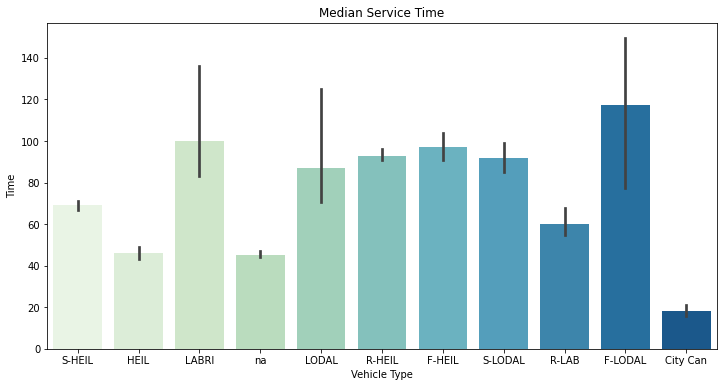

In [ ]:
# Does time differ based on vehicle type?

fig,ax = plt.subplots(figsize=(12,6))

sns.barplot(x = 'Vehicle Type', y = "Time", data = df_RGG_RSS,  ax= ax, palette='GnBu', estimator=np.median).set_title("Median Service Time")


In [ ]:
# Original 
df_RGG_RSS['Inside/Curb'].value_counts()

C     9991
I     4704
IC     409
CL     121
I       22
c        7
i        2
ic       1
         1
Name: Inside/Curb, dtype: int64

In [ ]:
df_RGG_RSS['Inside/Curb'] = df_RGG_RSS['Inside/Curb'].str.strip().replace('c', 'C').replace('i', 'I').replace('ic', 'IC').replace('',np.nan)

In [ ]:
# After
df_RGG_RSS['Inside/Curb'].value_counts()

C     9998
I     4728
IC     410
CL     121
Name: Inside/Curb, dtype: int64

Text(0.5, 1.0, 'Median Service Time')

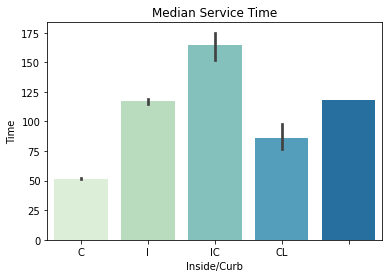

In [ ]:
fig,ax = plt.subplots()

sns.barplot(x = 'Inside/Curb', y = "Time", data = df_RGG_RSS,  palette='GnBu', estimator=np.median).set_title("Median Service Time")



In [ ]:
df_RGG_RSS['#Units'].value_counts()

2.0     4576
1.0     4552
0.0     1862
3.0     1763
4.0     1444
5.0      519
6.0      352
7.0      156
8.0      112
9.0       63
10.0      35
11.0      26
12.0      24
14.0      12
15.0      11
13.0      11
16.0       7
17.0       7
21.0       5
19.0       4
24.0       3
20.0       3
18.0       3
55.0       1
25.0       1
22.0       1
28.0       1
23.0       1
Name: #Units, dtype: int64

Text(0.5, 1.0, 'Median Service Time')

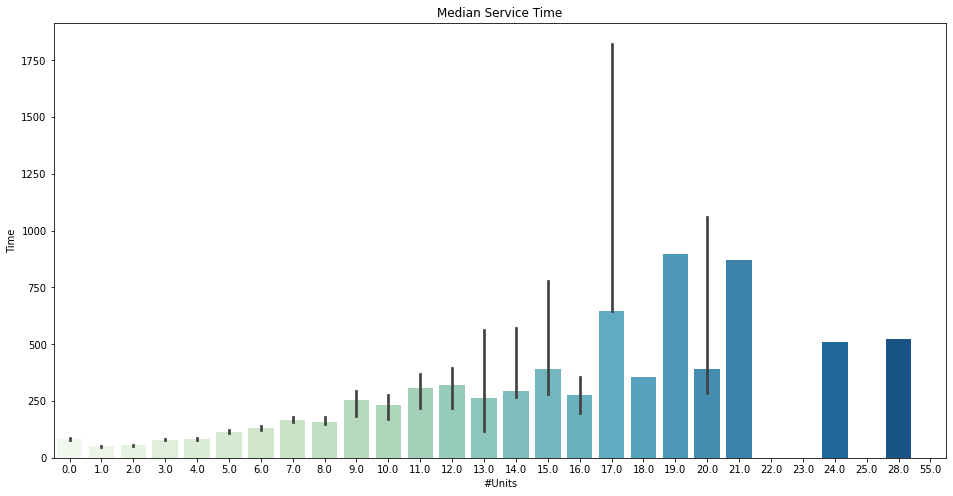

In [ ]:
fig,ax = plt.subplots(figsize=(16,8))

sns.barplot(x = '#Units', y = "Time", data = df_RGG_RSS,  ax=ax, palette='GnBu', estimator=np.median).set_title("Median Service Time")


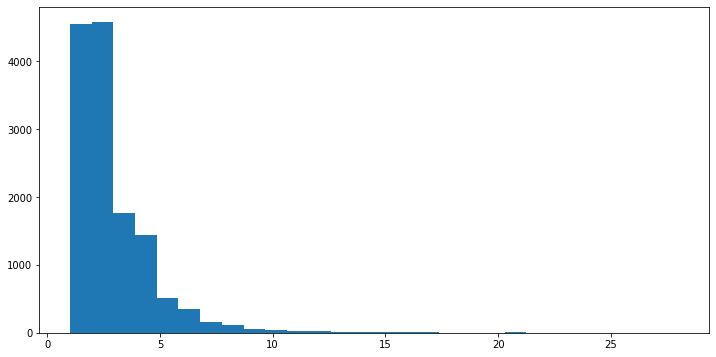

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))

plt.hist(df_RGG_RSS['#Units'], bins=28,range=(1,28))

plt.show()

In [ ]:
# '16 gal', '20 gal', '32 gal', '64 gal', '96 gal'

df_RGG_RSS['16 gal'].value_counts()

0.0     13841
1.0      1217
2.0       411
3.0        52
4.0        22
5.0        10
6.0         3
13.0        1
Name: 16 gal, dtype: int64

In [ ]:
df_RGG_RSS['20 gal'].value_counts()

0    15078
1      384
2       83
3       11
4        2
Name: 20 gal, dtype: int64

In [ ]:
df_RGG_RSS['32 gal'].value_counts()

0.0     9645
1.0     3074
2.0     1648
3.0      669
4.0      297
5.0      113
6.0       61
7.0       19
8.0       11
9.0        5
10.0       5
11.0       3
12.0       3
18.0       2
14.0       1
13.0       1
Name: 32 gal, dtype: int64

In [ ]:
df_RGG_RSS['64 gal'].value_counts()

0.0     9884
1.0     3430
2.0     1462
3.0      423
4.0      178
5.0       74
6.0       36
7.0       19
8.0       17
10.0       9
9.0        8
13.0       6
14.0       5
11.0       3
12.0       2
15.0       1
Name: 64 gal, dtype: int64

In [ ]:
df_RGG_RSS['96 gal'].value_counts()

0     10102
1      3029
2      1385
3       426
4       274
5       107
6        77
7        48
8        33
9        17
11       16
12       10
10        8
15        7
13        4
16        4
14        3
17        2
21        2
24        2
18        1
19        1
Name: 96 gal, dtype: int64

In [ ]:
# This is a valid row 
df_RGG_RSS.loc[df_RGG_RSS['96 gal']==19]

,Commodity,Vehicle Type,Inside/Curb,16 gal,20 gal,32 gal,64 gal,96 gal,Neighborhood,Meandor,Route,Tipper,Key Code?,Day,#Units,Time
312,Garbage/Recycle,R-HEIL,I,0.0,0,0.0,0.0,19,Tenderloin,NaN,239,2.0,0,3,19.0,897.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=938c6ad9-491d-4307-bf8a-c751a244ce4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>